#Predecting customer subscription in bank marketing campaingns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/bank-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df[df["y"]=="yes"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#Problem Statement
This project uses data from a Portuguese banking institution's direct marketing campaigns to predict whether a client will subscribe to a term deposit (variable 'y'). These campaigns involved phone calls, and clients were often contacted multiple times to determine their interest. The objective is to build a classification model that can accurately predict client subscription outcomes ('yes' or 'no').

#Exploratory data analysis

In [5]:
df.shape

(45211, 17)

In [6]:
##Null check
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:
df["y"].value_counts(normalize=True)

,proportion
y,
no,0.883015
yes,0.116985


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Observation


*   The avg age of clients in around 41 Years.
*   
The Average Yearly balance is 1362.27, but there's large standard deviation, indicating wide range of balance.
*   The 'pdays'column (day since last contact) has large number of '-1' values, representing clients who were not previlously contacted.
*   
The 'duration' column (last contact duration) has wide range, with maximum value of 4918 second.


## Unvariate Analysis

# Target Variable Distribution

In [10]:
print("Target Variable Distribution:")
print (df['y'].value_counts())

Target Variable Distribution:
y
no     39922
yes     5289
Name: count, dtype: int64


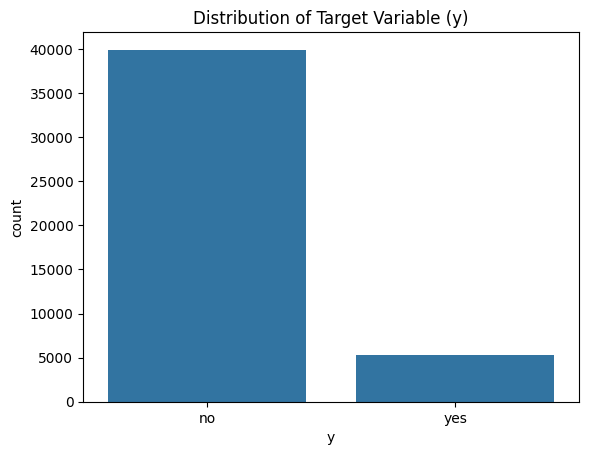

In [11]:
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.show()

# Numerical Features EDA

In [12]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

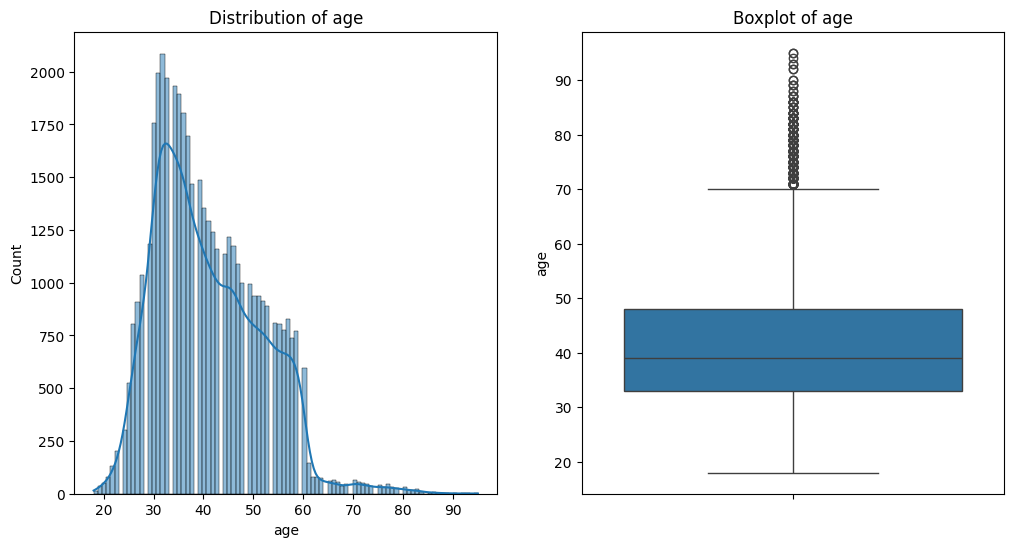

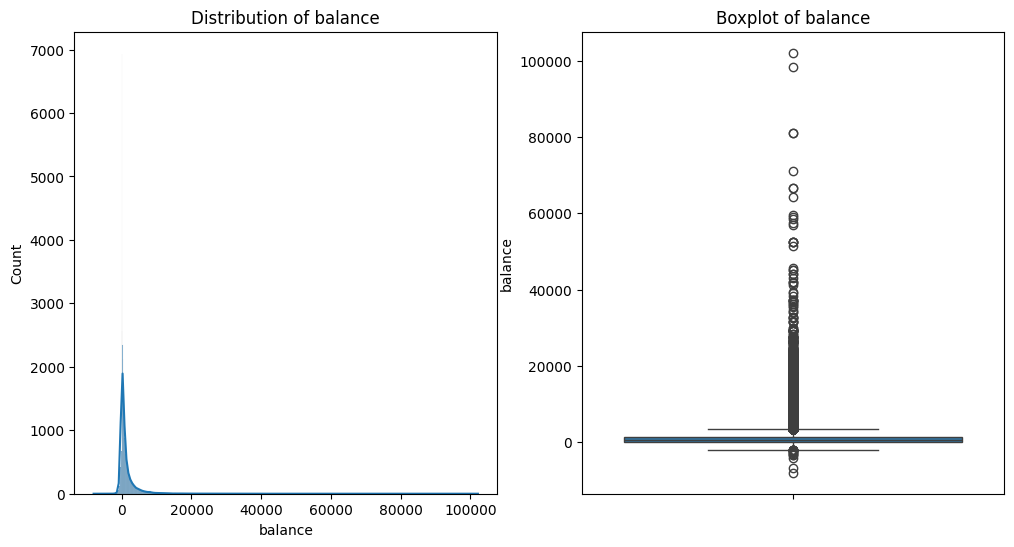

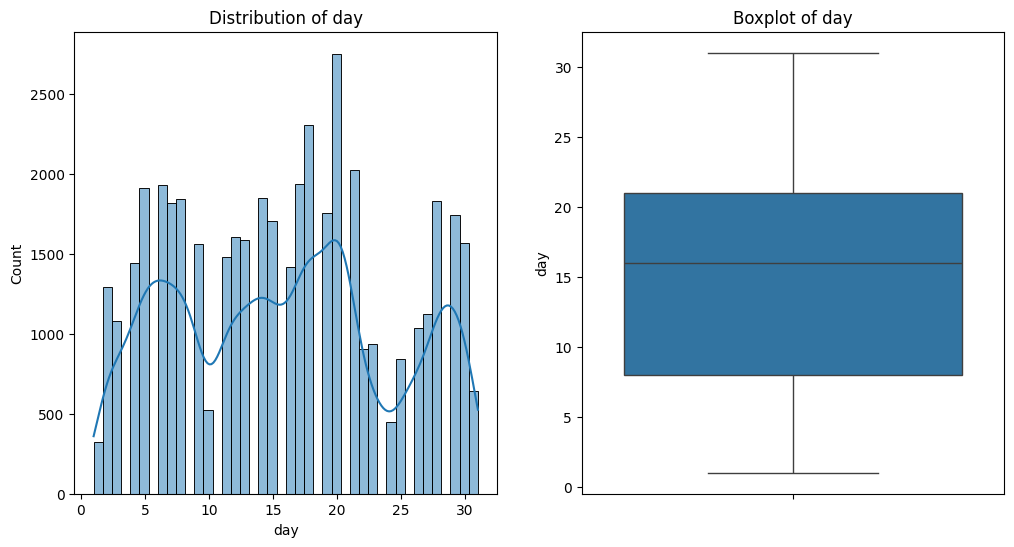

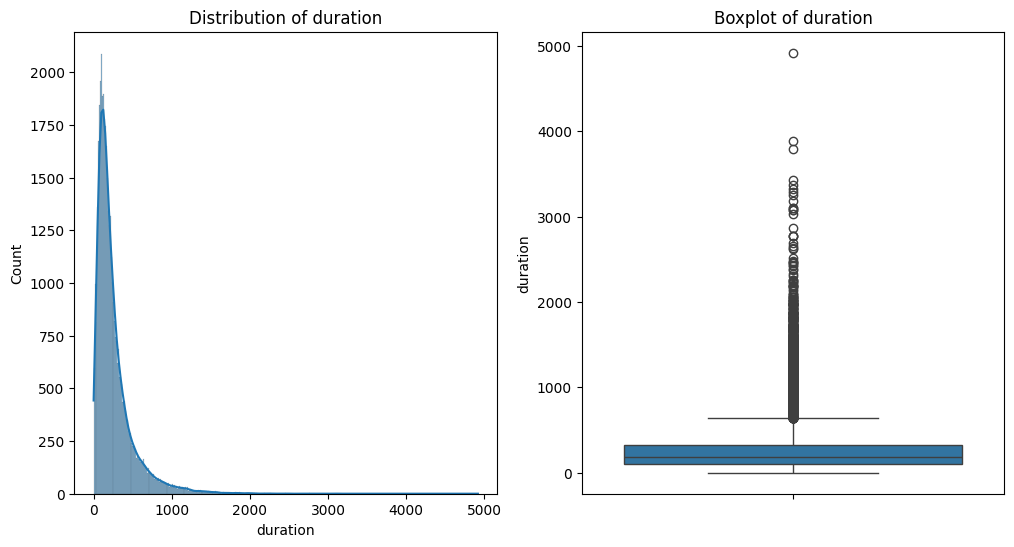

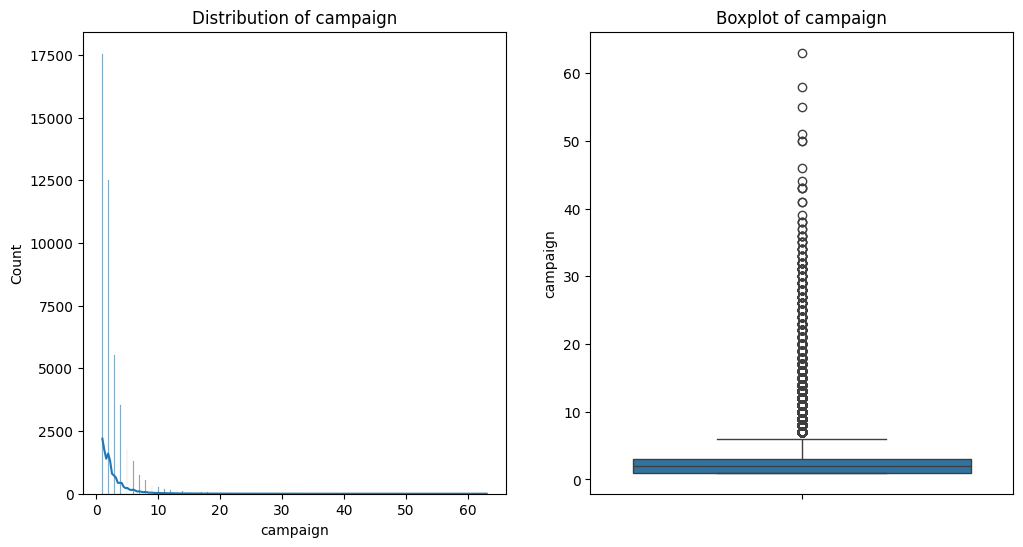

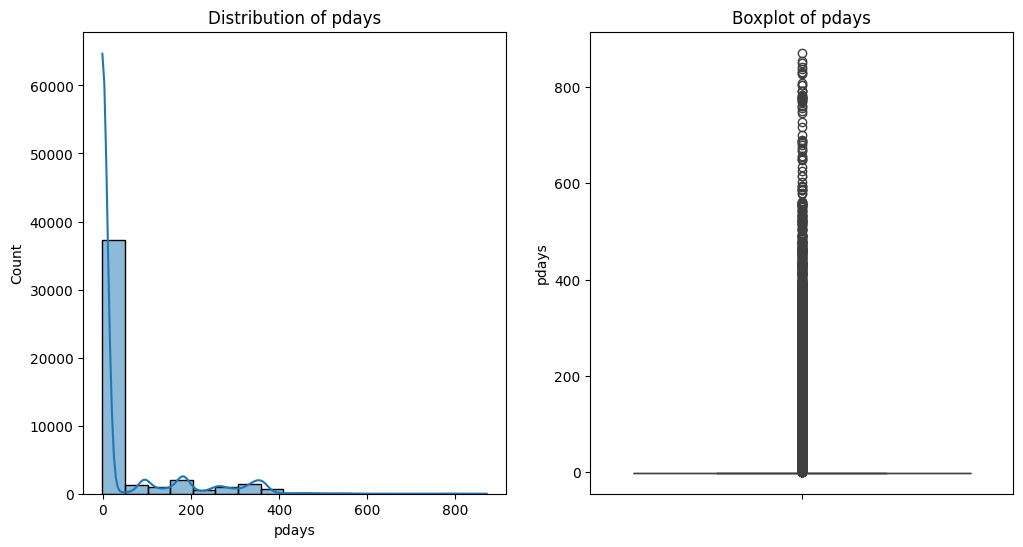

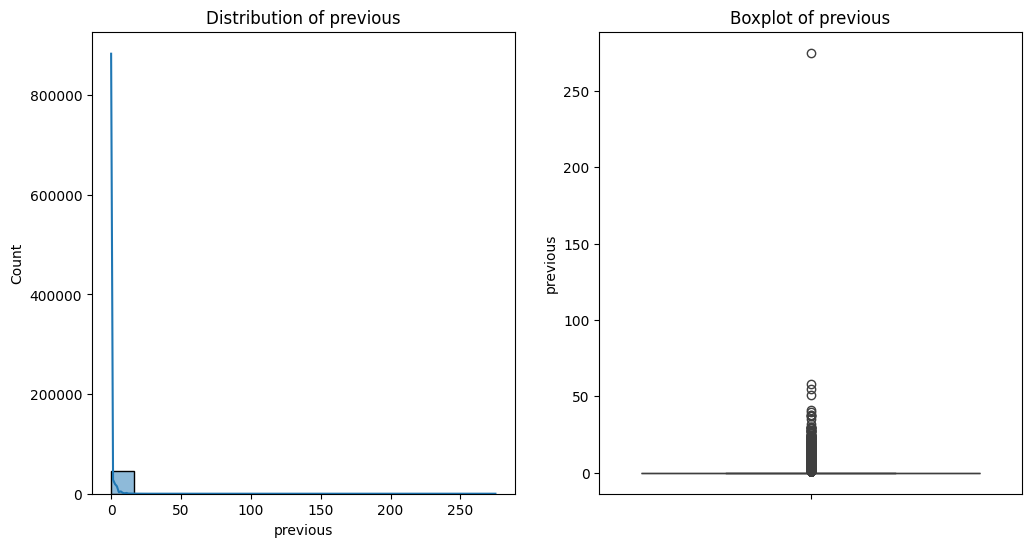

In [13]:
for features in numerical_features:
  plt.figure(figsize=(12, 6))
  plt.subplot(1,2,1)
  sns.histplot(df[features], kde=True)
  plt.title(f'Distribution of {features}')
  plt.subplot(1,2,2)
  sns.boxplot(y=df[features])
  plt.title(f'Boxplot of {features}')
  plt.show()

- The variables age, balance, duration, campaign, pdays, and previous contain outliers. pdays, and previous have a flat interquartile range; it is best to remove those columns.
- Variable day does not have any outliers.
Most people in the dataset are between 25 and 60 years old, but there are a few older individuals over 90.

- Many customers have very low or even zero account balances, while a few have very high balances.

- Call durations are mostly short, but when calls are longer, they tend to be more successful.

- Most people were contacted only once or twice during the campaign, but a few were contacted many times.

- The pdays column shows that most customers hadn’t been contacted before, which is marked by the value 999.

- The previous column tells us that most customers had no prior contact before this campaign.


# Categorical Features EDA





In [14]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

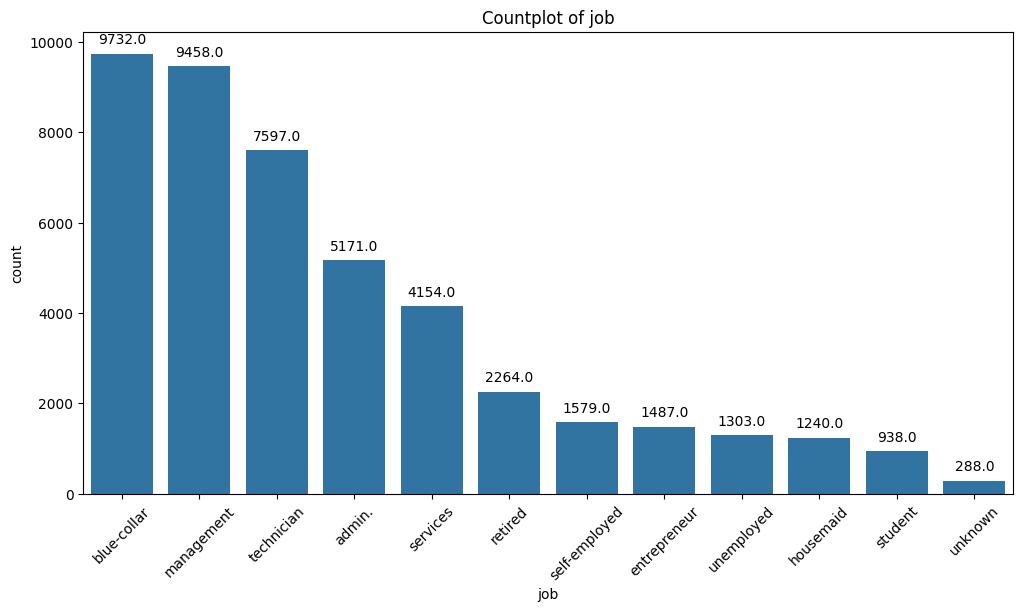

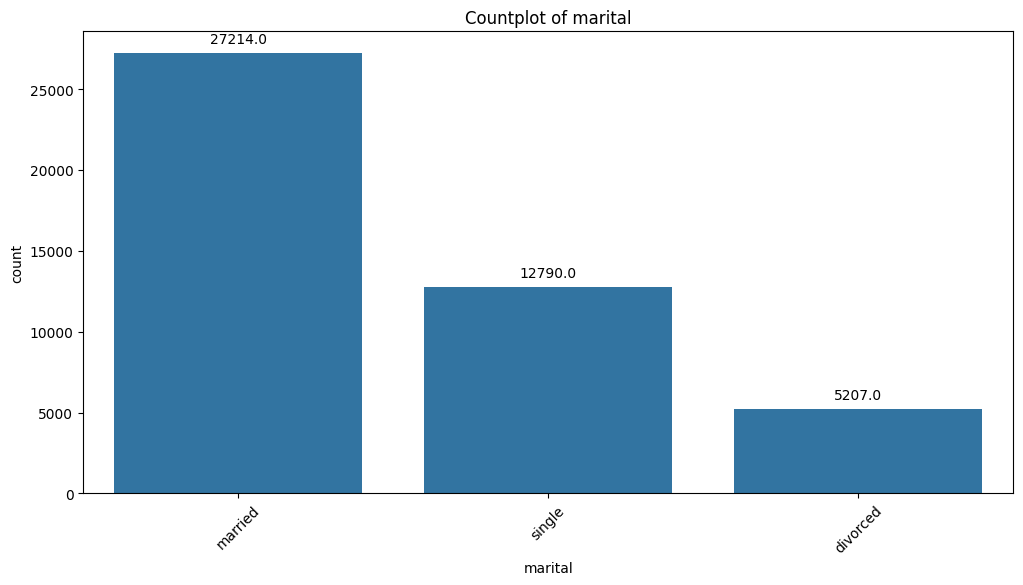

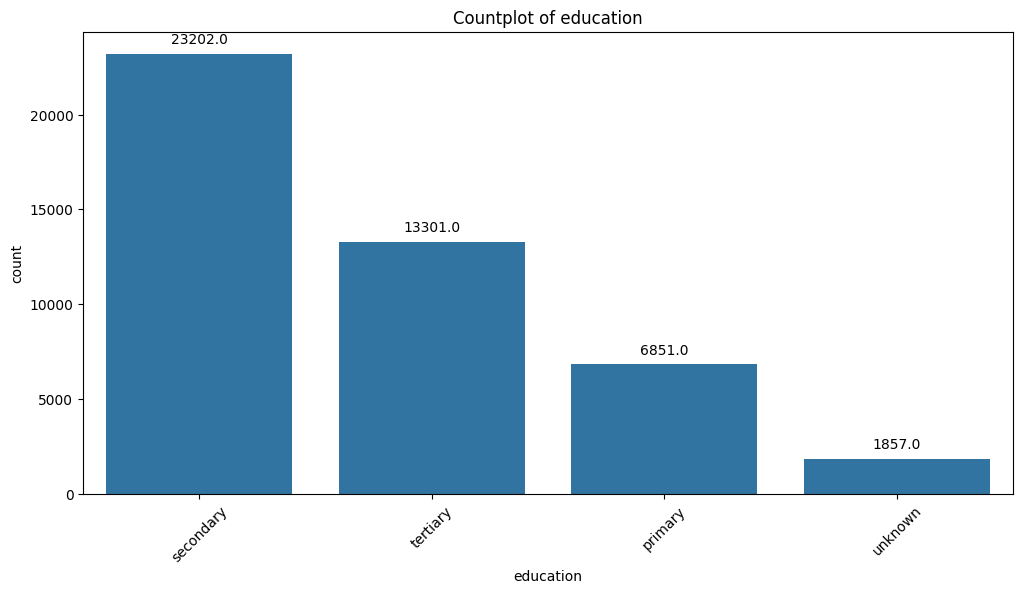

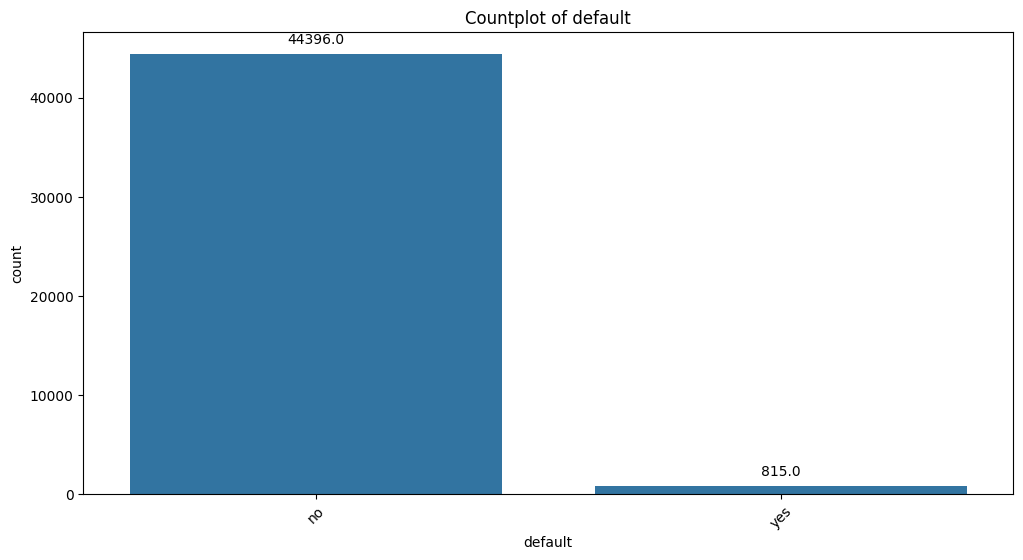

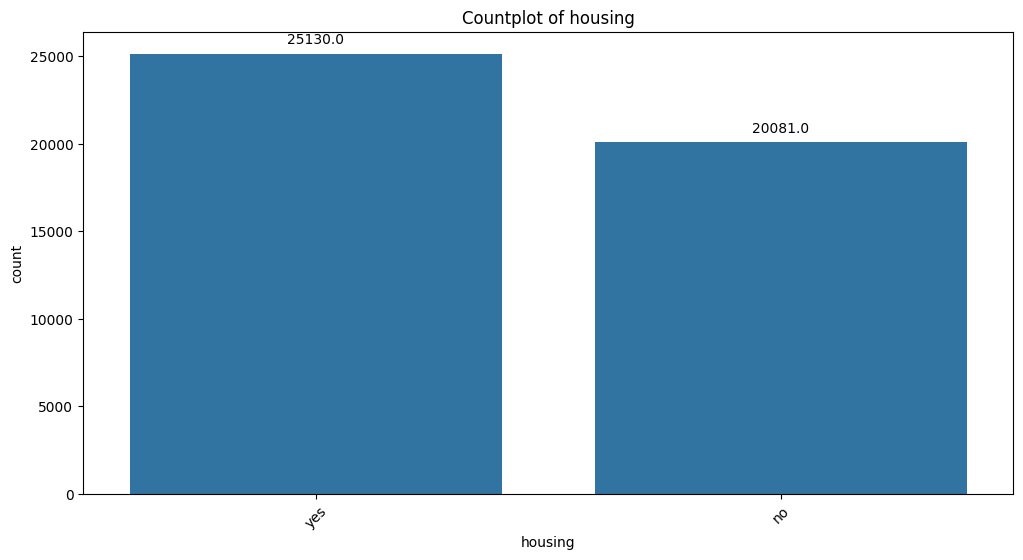

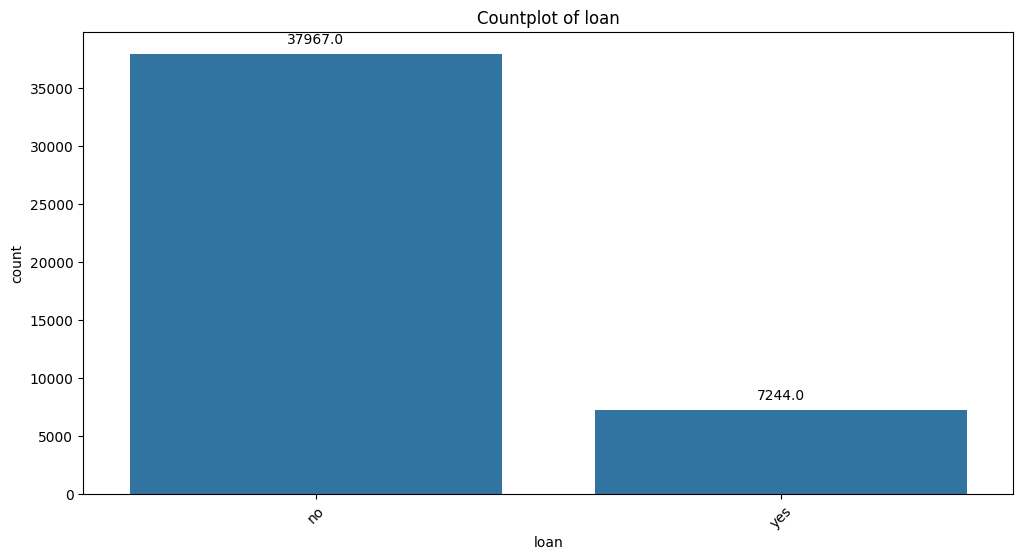

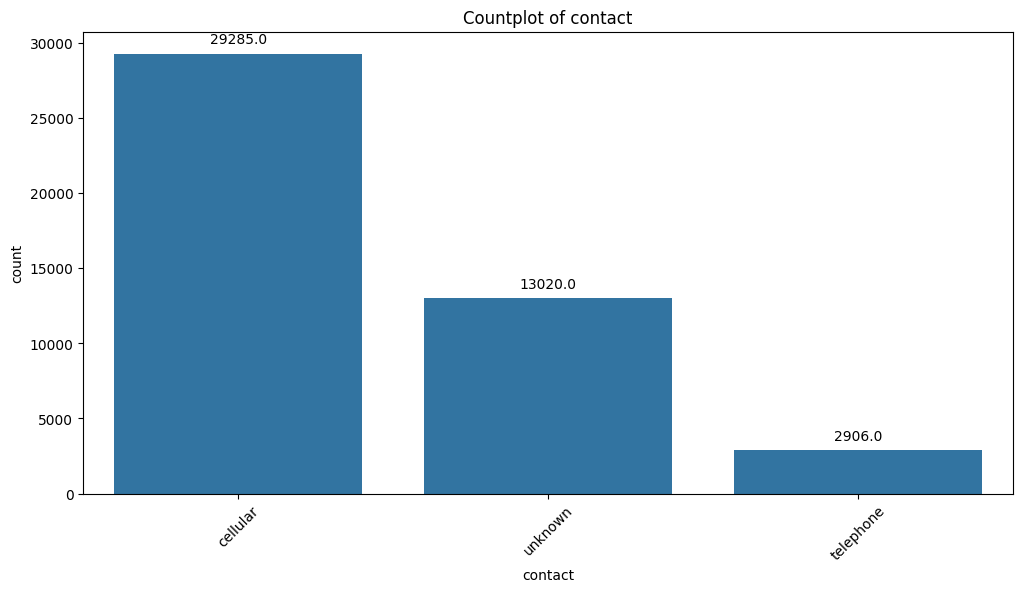

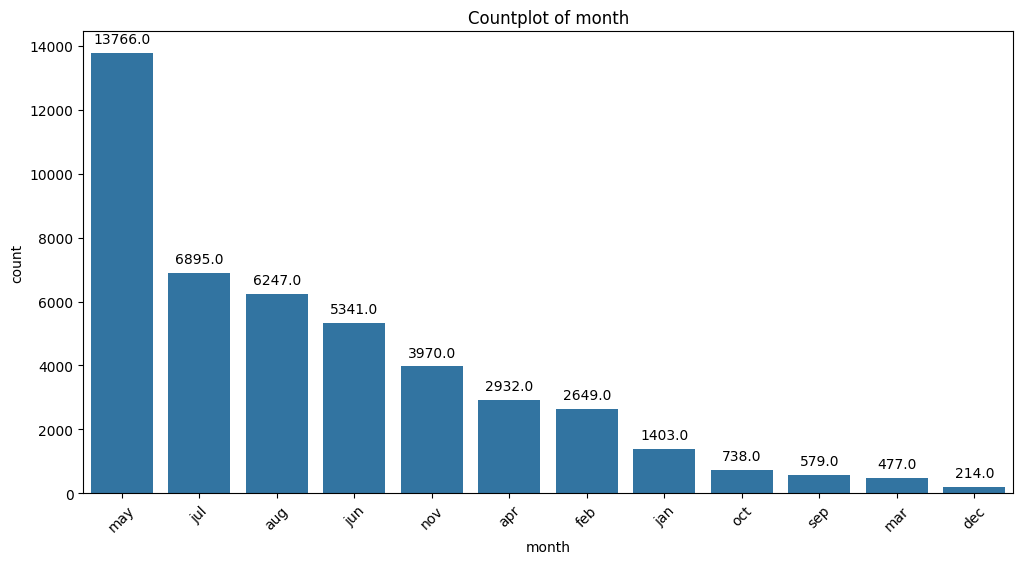

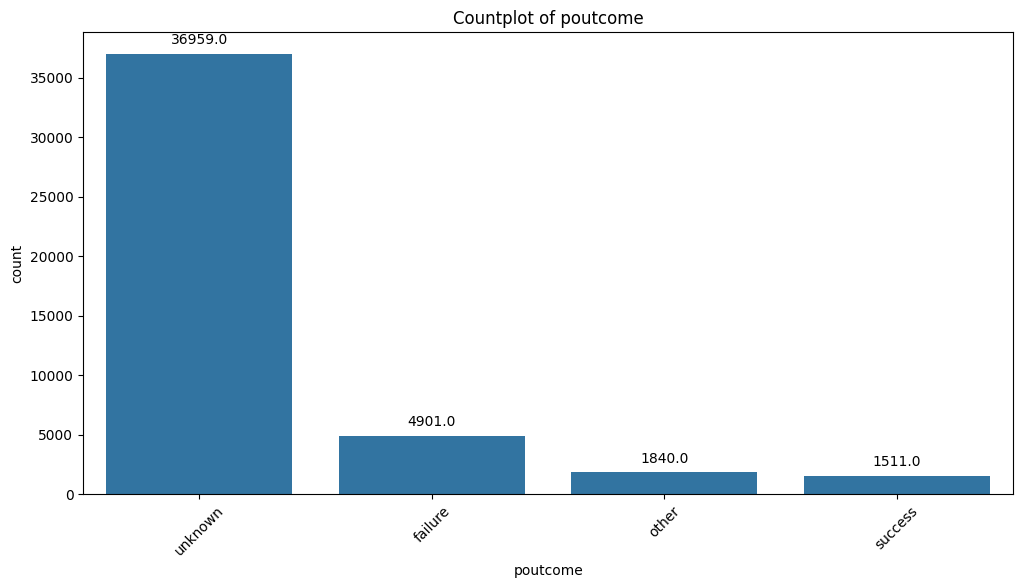

In [15]:
for features in categorical_features:

  plt.figure(figsize=(12, 6))
  ax = sns.countplot(x=df[features], order=df[features].value_counts().index)
  plt.title(f'Countplot of {features}')
  plt.xticks(rotation=45)

  for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  plt.show()

# Observation
- Most people in the data work in blue-collar, management, or technician jobs.

- The majority are married, with fewer people who are single or divorced.

- A large portion of the customers have a secondary education, while some have gone to college or only finished primary school.

- Nearly everyone has no history of credit default, which means they’re generally financially reliable.

- Many people have a housing loan, but a smaller group has a personal loan.

- When it comes to how the bank contacted people, cell phones were used the most.

- May was the most active month for campaigns, followed by July and August.

- Most customers had not been previously contacted, and even if they had, it usually happened only once or twice.

# Categorical vs Target Variable

---



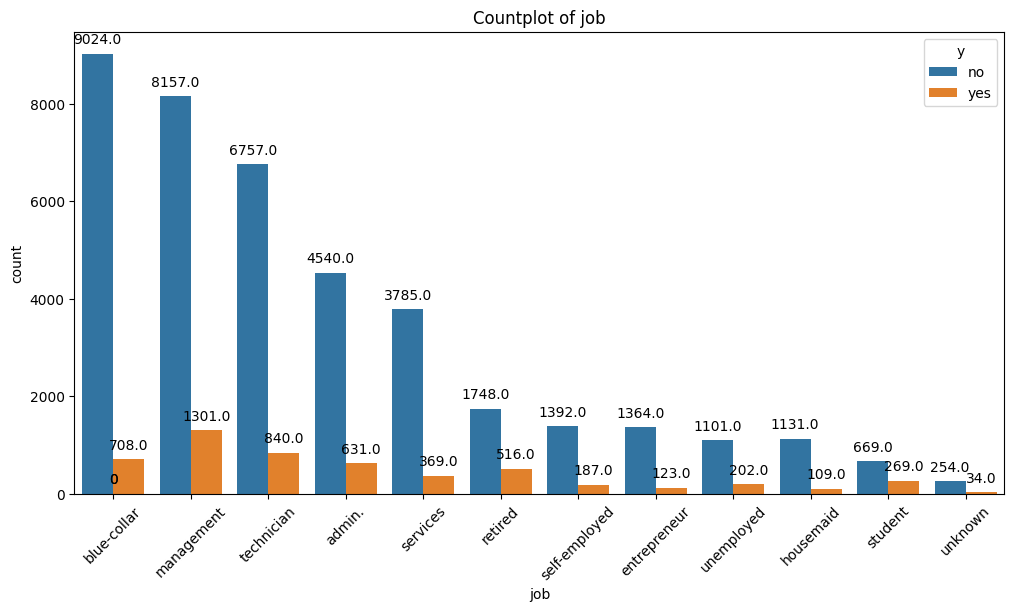

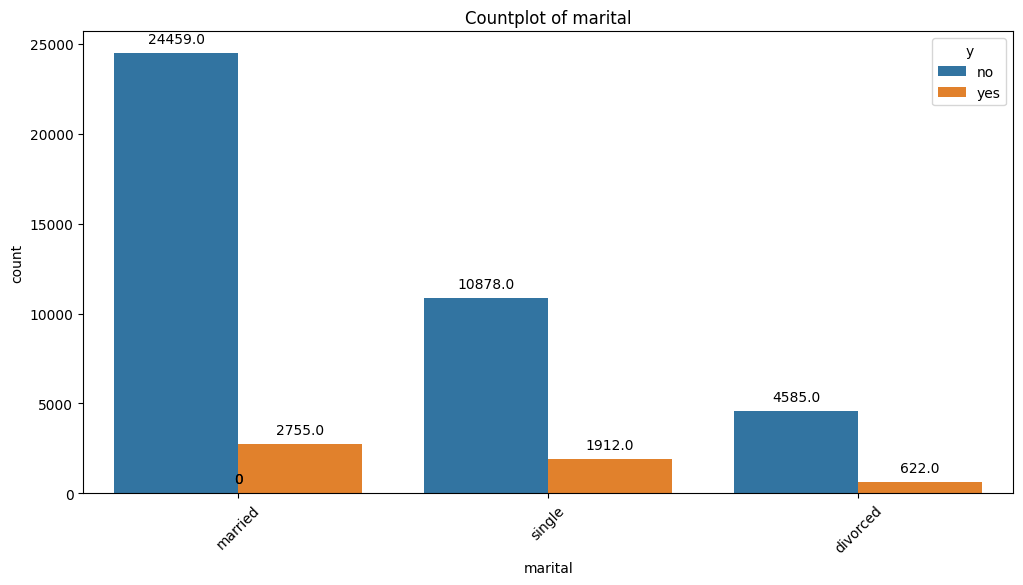

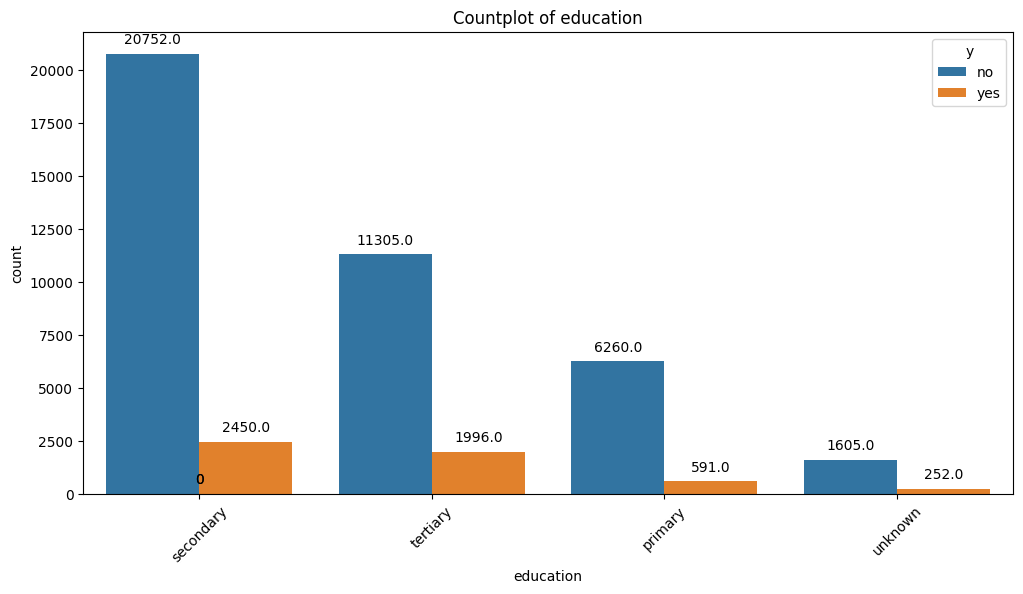

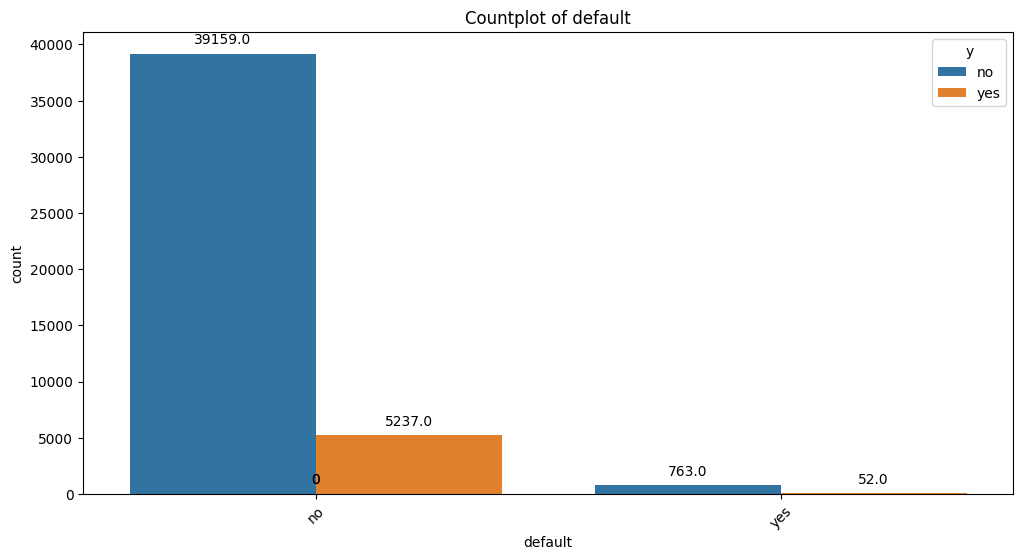

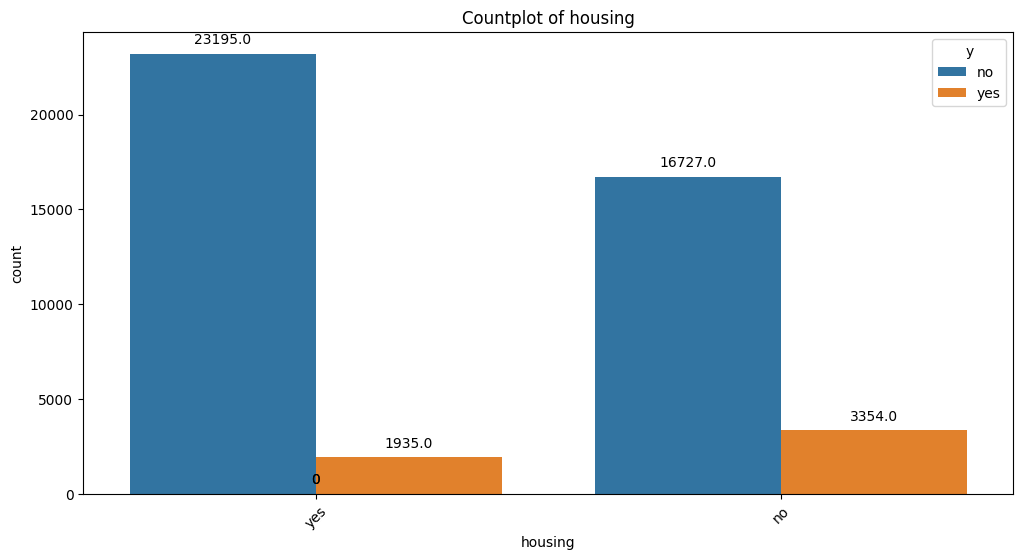

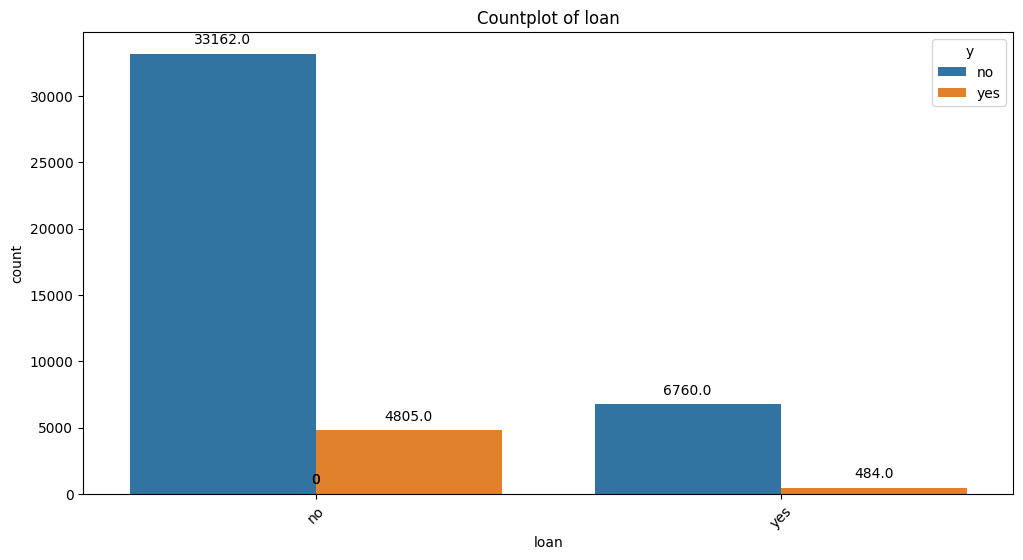

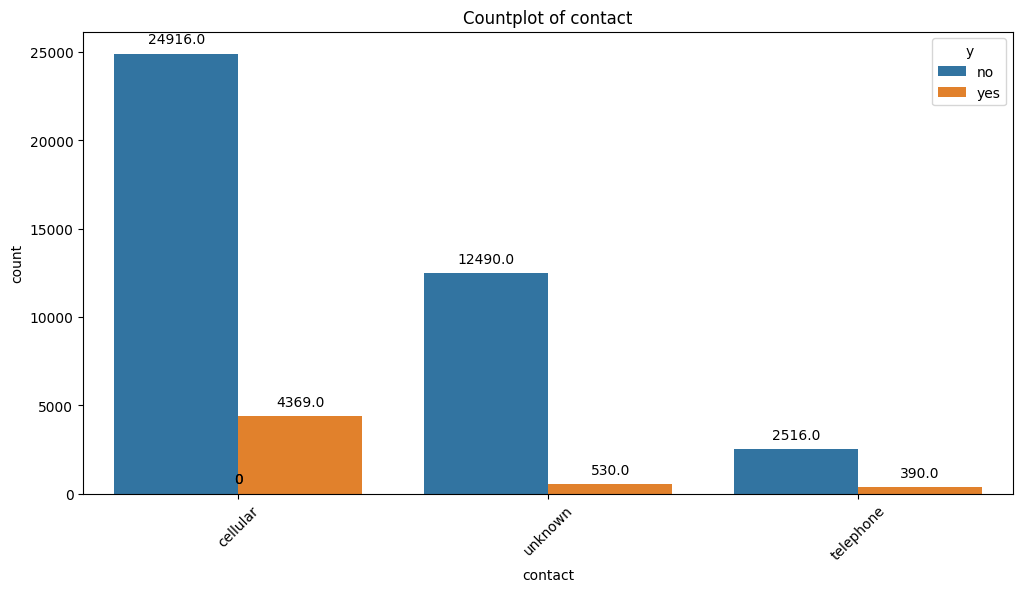

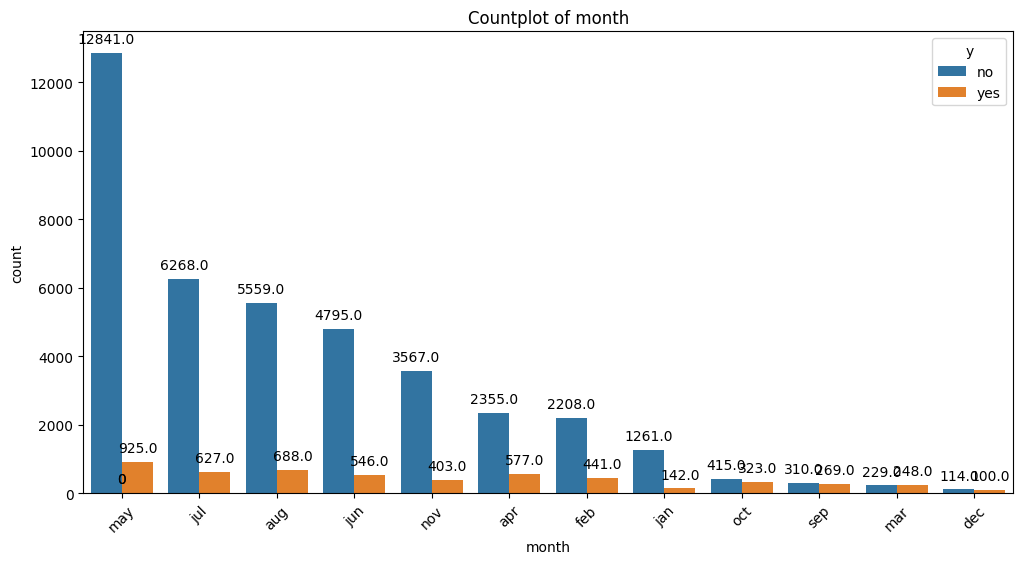

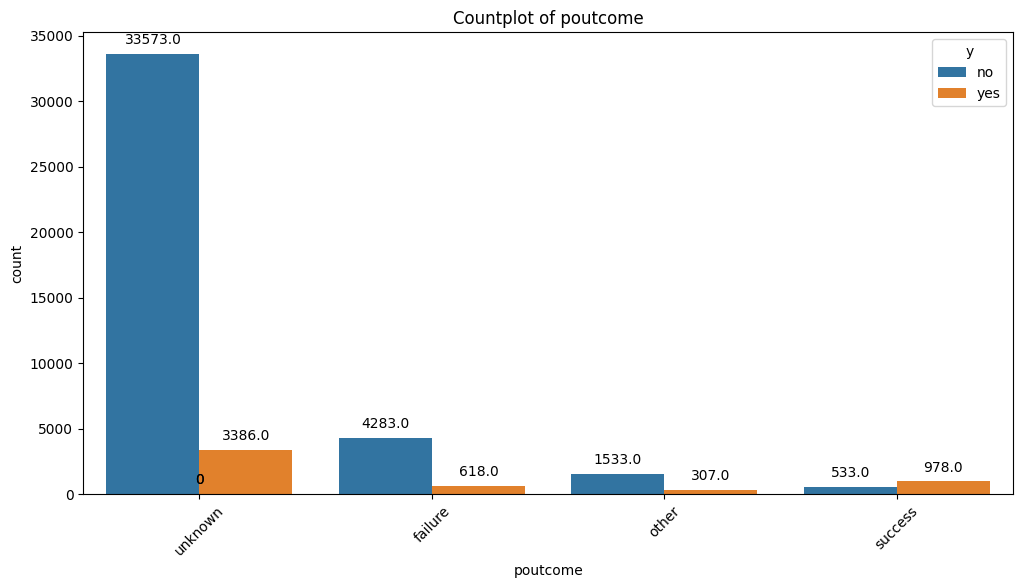

In [16]:
for features in categorical_features:

  plt.figure(figsize=(12, 6))
  ax = sns.countplot(x=df[features],hue=df["y"], order=df[features].value_counts().index)
  plt.title(f'Countplot of {features}')
  plt.xticks(rotation=45)

  for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  plt.show()

# Numerical Features vs target variables

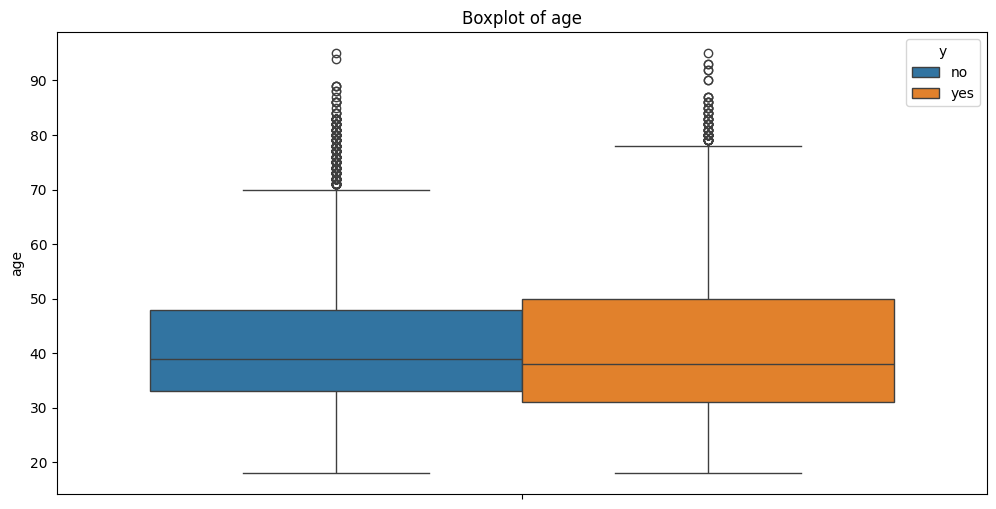

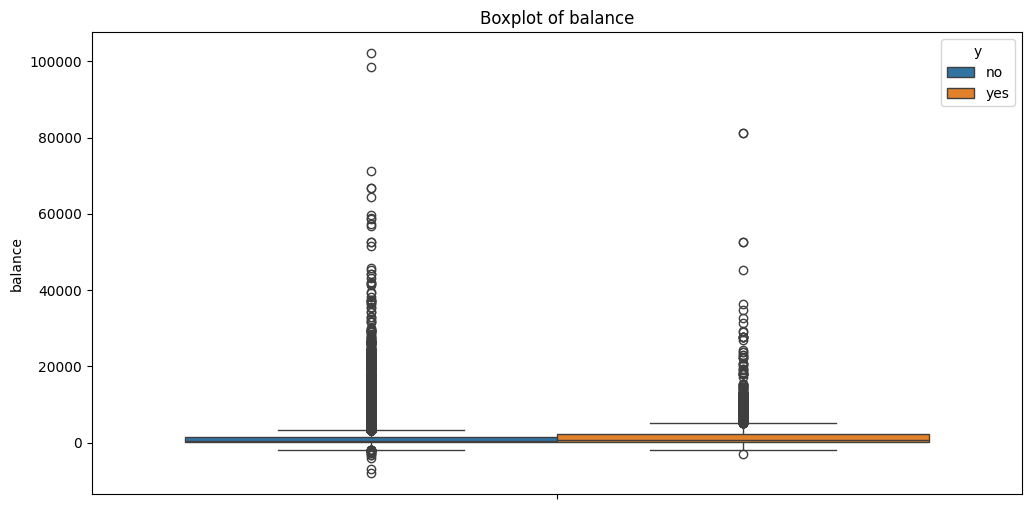

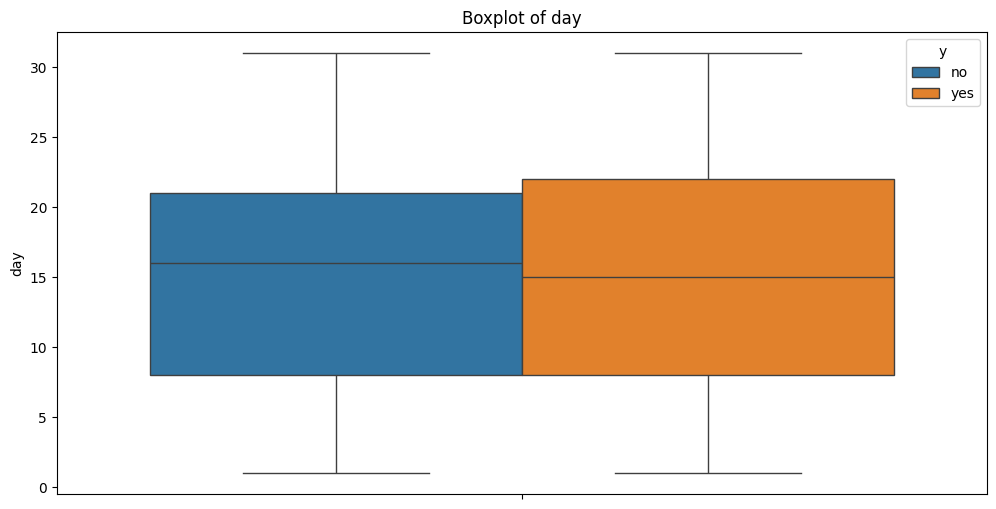

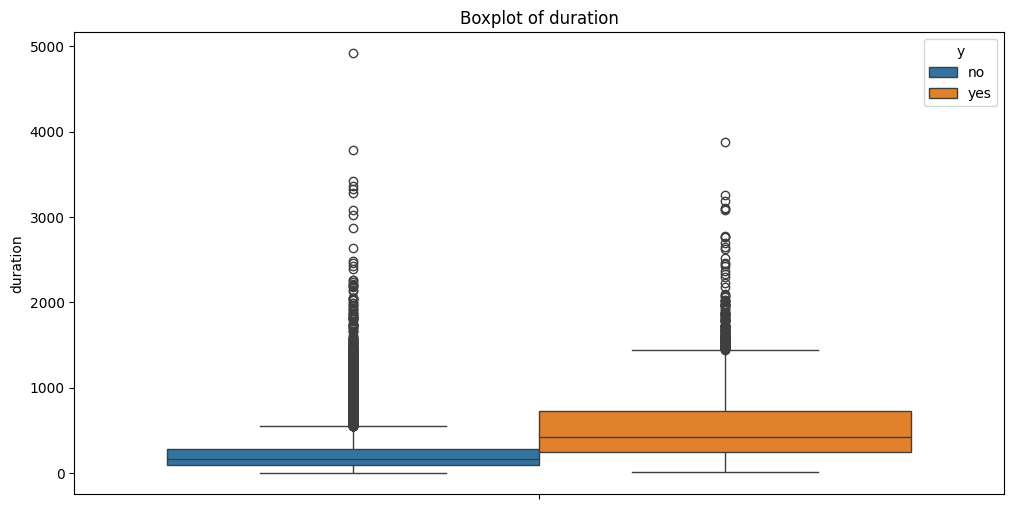

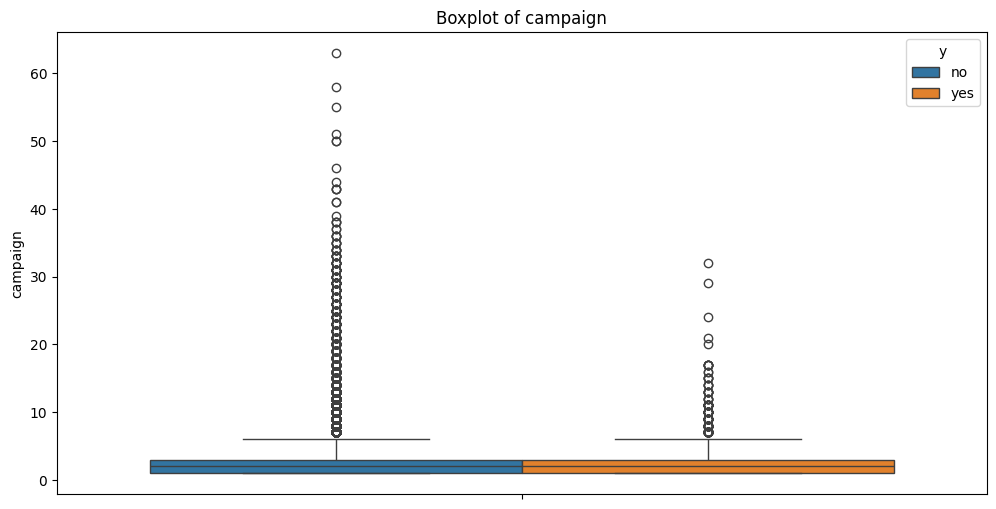

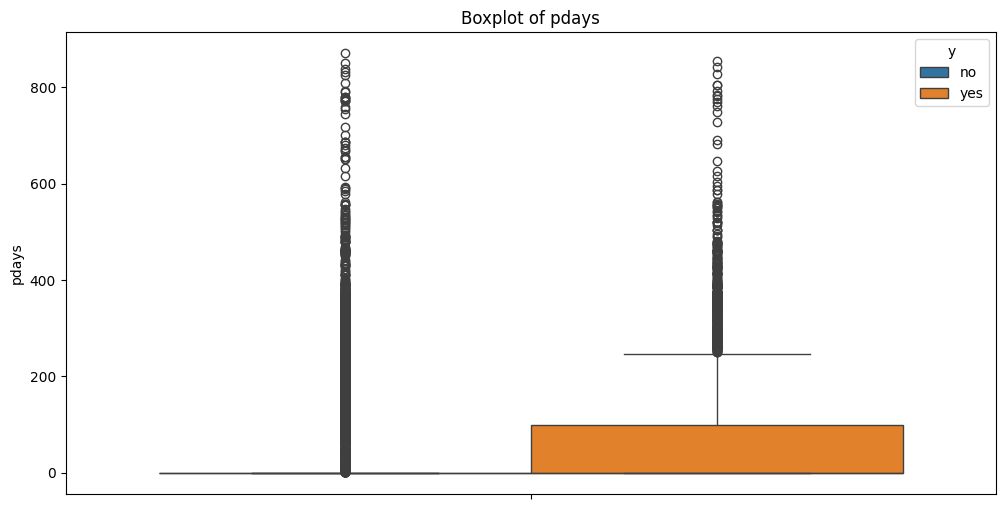

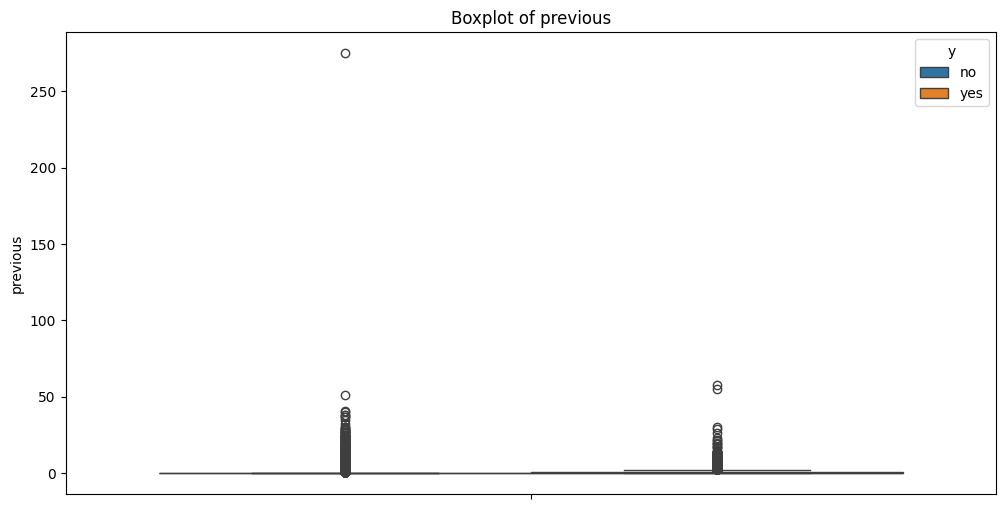

In [17]:
for features in numerical_features:
  plt.figure(figsize=(12, 6))
  sns.boxplot(y=df[features], hue=df['y'])
  plt.title(f'Boxplot of {features}')
  plt.show()


### Observations: Numerical Features vs Target Variable

- Clients who subscribed to the term deposit offer were generally older compared to those who did not.
- People with higher account balances were more likely to subscribe.
- The longer a client stayed on the call, the more likely they were to subscribe — duration had a clear positive impact.
- Clients who were contacted fewer times during the campaign were more likely to say yes.
- Those who were contacted recently in a past campaign (lower `pdays`) were more likely to subscribe.
- If a client had been contacted more than once in the past (`previous`), their chances of subscribing increased slightly.


# Corelation Matrix

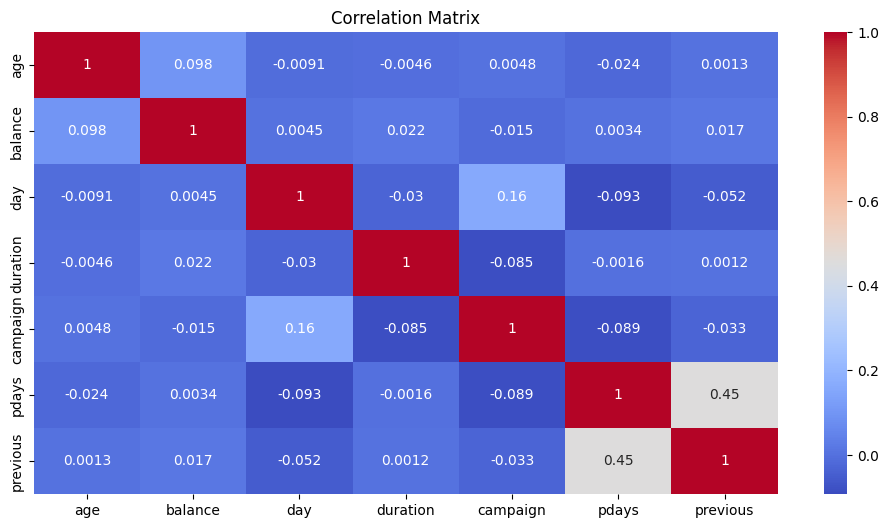

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# independent Features has very low correlation

In [19]:
df["poutcome"].value_counts()

,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


# segmentation of numerical columns

In [20]:
#age_bins= [10,20,40,80,100]
#age_bin_labels = ["teenager", "adults", "senior", "old"]
#df["age"] = pd.cut(df["age"], bins=age_bins, labels=age_bin_labels)

In [21]:
df["balance"].max()

102127

In [22]:
def segment_age(df):
    age_bins = [17, 25, 35, 50, 65, 100]
    age_labels = ["young adults", "emerging professionals", "established professionals", "pre-retirement phase", "retiree"]
    df["age segmentation"] = pd.cut(df["age"], bins=age_bins, labels=age_labels)
    df["age segmentation"] = df["age segmentation"].astype("object")
    return df

def segment_balance(df):
    balance_bins = [-8100, 200, 1000, 5000, 15000, 100000]
    balance_labels = ["low balance", "moderate balance", "comfortable savers", "wealth builders", "high net worth"]
    df["balance segmentation"] = pd.cut(df["balance"], bins=balance_bins, labels=balance_labels)
    df["balance segmentation"] = df["balance segmentation"].astype("object")
    return df

def month_to_season(df):
    season_mapping = {
        'dec': 'winter', 'jan': 'winter', 'feb': 'winter',
        'mar': 'spring', 'apr': 'spring', 'may': 'spring',
        'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
        'sep': 'fall', 'oct': 'fall', 'nov': 'fall'
    }
    df["season"] = df["month"].str.lower().map(season_mapping)
    return df




In [23]:
df = segment_age(df)
df = segment_balance(df)
df = month_to_season(df)

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age segmentation,balance segmentation,season
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,pre-retirement phase,comfortable savers,spring
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,established professionals,low balance,spring
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,emerging professionals,low balance,spring
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,established professionals,comfortable savers,spring
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,emerging professionals,low balance,spring


In [25]:
columns_to_drop = ['age', 'balance', 'month', 'poutcome', 'contact']
df=df.drop(columns=columns_to_drop)

In [26]:
df.head()

,job,marital,education,default,housing,loan,day,duration,campaign,pdays,previous,y,age segmentation,balance segmentation,season
0,management,married,tertiary,no,yes,no,5,261,1,-1,0,no,pre-retirement phase,comfortable savers,spring
1,technician,single,secondary,no,yes,no,5,151,1,-1,0,no,established professionals,low balance,spring
2,entrepreneur,married,secondary,no,yes,yes,5,76,1,-1,0,no,emerging professionals,low balance,spring
3,blue-collar,married,unknown,no,yes,no,5,92,1,-1,0,no,established professionals,comfortable savers,spring
4,unknown,single,unknown,no,no,no,5,198,1,-1,0,no,emerging professionals,low balance,spring


In [27]:
df['y'] = df['y'].map({'yes':1, 'no':0})


In [28]:
df.head(5)

,job,marital,education,default,housing,loan,day,duration,campaign,pdays,previous,y,age segmentation,balance segmentation,season
0,management,married,tertiary,no,yes,no,5,261,1,-1,0,0,pre-retirement phase,comfortable savers,spring
1,technician,single,secondary,no,yes,no,5,151,1,-1,0,0,established professionals,low balance,spring
2,entrepreneur,married,secondary,no,yes,yes,5,76,1,-1,0,0,emerging professionals,low balance,spring
3,blue-collar,married,unknown,no,yes,no,5,92,1,-1,0,0,established professionals,comfortable savers,spring
4,unknown,single,unknown,no,no,no,5,198,1,-1,0,0,emerging professionals,low balance,spring


# Train and Test

In [29]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['y'])
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#categorical_features = ["job", "marital", "education", "default", "housing", "loan", "age segmentation", "balance segmentation", "season"]

In [30]:
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=['int64']).columns
x.dtypes

,0
job,object
marital,object
education,object
default,object
housing,object
loan,object
day,int64
duration,int64
campaign,int64
pdays,int64


In [31]:
y_train

,y
3344,0
17965,0
18299,0
10221,0
32192,1
...,...
11284,1
44732,0
38158,0
860,0


In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

x_train_encoded = encoder.fit_transform(x_train[categorical_features])
x_test_encoded = encoder.transform(x_test[categorical_features])

# covert encoded data to dataframe
encoded_cols = encoder.get_feature_names_out(categorical_features)
x_train_encoded_df = pd.DataFrame(x_train_encoded.toarray(),index=x_train.index, columns=encoded_cols)
x_test_encoded_df = pd.DataFrame(x_test_encoded.toarray(),index=x_test.index, columns=encoded_cols)

In [33]:
x_train_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,balance segmentation_comfortable savers,balance segmentation_high net worth,balance segmentation_low balance,balance segmentation_moderate balance,balance segmentation_wealth builders,balance segmentation_nan,season_fall,season_spring,season_summer,season_winter
3344,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32192,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
# scale numerical features
from sklearn.preprocessing import StandardScaler
numerical_scaler = StandardScaler()

x_train[numerical_features] = numerical_scaler.fit_transform(x_train[numerical_features])

x_test[numerical_features] = numerical_scaler.transform(x_test[numerical_features])

In [35]:
x_train[numerical_features].head()

,day,duration,campaign,pdays,previous
3344,-0.098218,-0.719756,-0.565886,-0.411364,-0.244772
17965,1.703422,0.047138,-0.245389,-0.411364,-0.244772
18299,1.823532,-0.493970,0.395606,-0.411364,-0.244772
10221,-0.578656,0.459781,2.639088,-0.411364,-0.244772
32192,-0.098218,0.027674,-0.245389,-0.411364,-0.244772


Text(0.5, 1.0, 'Distribution of day')

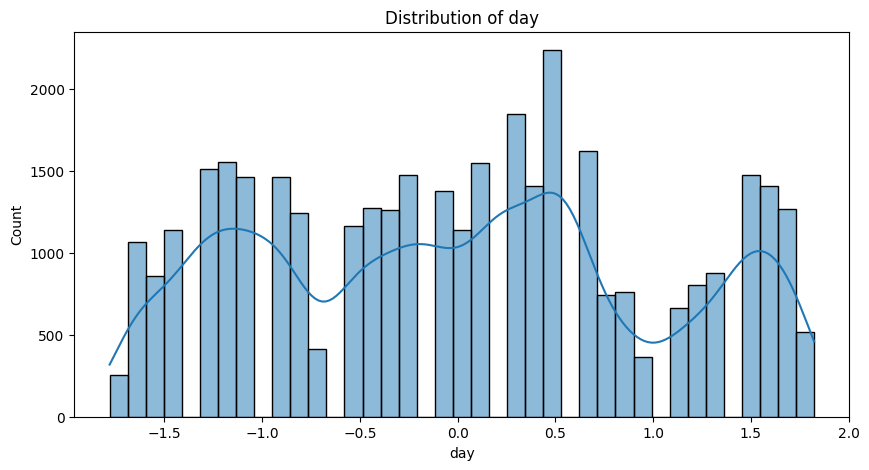

In [36]:
plt.figure(figsize = (10,5))
sns.histplot(x_train["day"], kde= True)
plt.title(f'Distribution of {"day"}')

In [37]:
# Combine transformed numerical features and one-hot encoded categorical features
x_train_processed = pd.concat([x_train[numerical_features].reset_index(drop=True), x_train_encoded_df.reset_index(drop=True)], axis=1)
x_test_processed = pd.concat([x_test[numerical_features].reset_index(drop=True), x_test_encoded_df.reset_index(drop=True)], axis=1)


In [38]:
x_train_processed.head()

,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,balance segmentation_comfortable savers,balance segmentation_high net worth,balance segmentation_low balance,balance segmentation_moderate balance,balance segmentation_wealth builders,balance segmentation_nan,season_fall,season_spring,season_summer,season_winter
0,-0.098218,-0.719756,-0.565886,-0.411364,-0.244772,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.703422,0.047138,-0.245389,-0.411364,-0.244772,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.823532,-0.493970,0.395606,-0.411364,-0.244772,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.578656,0.459781,2.639088,-0.411364,-0.244772,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.098218,0.027674,-0.245389,-0.411364,-0.244772,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [40]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train_processed, y_train) ##model training

LogisticRegression(random_state=42)

In [41]:
y_pred = lr.predict(x_test_processed)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8887537321685282
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.23      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



In [42]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train_processed, y_train) ##model training

RandomForestClassifier(random_state=42)

In [43]:
y_pred = random_forest_model.predict(x_test_processed)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8926241291606768
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.60      0.33      0.42      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.88      0.89      0.88      9043



In [44]:
bradient_boosting_model = GradientBoostingClassifier(random_state=42)
bradient_boosting_model.fit(x_train_processed, y_train) ##model training


GradientBoostingClassifier(random_state=42)

In [45]:
y_pred = bradient_boosting_model.predict(x_test_processed)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8974897710936636
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [46]:
## Hyper parameter tuning using Grid search

In [47]:
df["y"].value_counts(normalize=True)

,proportion
y,
0,0.883015
1,0.116985


In [48]:
from imblearn.over_sampling import SMOTE


In [49]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_processed, y_train)

In [50]:
y_train_smote.value_counts(normalize=True)

,proportion
y,
0,0.5
1,0.5


In [51]:
bradient_boosting_model = GradientBoostingClassifier(random_state=42)
bradient_boosting_model.fit(x_train_smote, y_train_smote) ##model training

y_pred = bradient_boosting_model.predict(x_test_processed)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8692911644365808
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7952
           1       0.47      0.69      0.56      1091

    accuracy                           0.87      9043
   macro avg       0.71      0.79      0.74      9043
weighted avg       0.90      0.87      0.88      9043



In [55]:
XGBClassifier_model = XGBClassifier(random_state=42)
XGBClassifier_model.fit(x_train_smote, y_train_smote) ##model training

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [57]:
y_pred = XGBClassifier_model.predict(x_test_processed)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8959416122968041
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.58      0.48      0.53      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.72      0.73      9043
weighted avg       0.89      0.90      0.89      9043



### 🔍 Observations
- We observed **performance improvement** after applying **cross-validation**.
- **Higher accuracy** was achieved with the **cross-validated XGBoost model** compared to the simple train-test split approach.
- The **accuracy improved** from **0.91 (train_test_split)** to **0.93 (cross-validation)**.
- A **significant improvement** was found in **precision**, increasing from **0.90 to 0.94**.



###  Conclusion
- The **XGBoost classifier** delivered the **best performance** across all models tested.
- It achieved the **highest metrics**:  
  - **Accuracy**: 0.93  
  - **Precision**: 0.94  
  - **Recall**: 0.93  
  - **F1-Score**: 0.93  
  - **ROC-AUC Score**: 0.93
- This indicates that XGBoost (XGBClassifier) is highly reliable and effective in **classifying whether a client will subscribe to a term deposit or not**.
- The **ROC-AUC score of 0.93**, being close to 1, shows the model’s excellent ability to distinguish between the two classes.
